In [3]:
import pandas as pd
import numpy as np

movies_csv=pd.read_csv(r"C:\Users\nagab\OneDrive\Desktop\ml_1\tmdb_5000_movies.csv")
credits_csv=pd.read_csv(r"C:\Users\nagab\OneDrive\Desktop\ml_1\tmdb_5000_credits.csv")



In [4]:
movies_csv.rename(columns={'id': 'movie_id'},inplace=True)


In [5]:
df= movies_csv.merge(credits_csv,on='movie_id',how='inner')
df.head(2)


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
import ast


In [5]:
df['keywords']=df['keywords'].apply(ast.literal_eval)

keyword_expand=df[['movie_id','keywords']].explode('keywords')
keywords_df=pd.json_normalize(keyword_expand['keywords'])
keyword_table=pd.concat([keyword_expand['movie_id'].reset_index(drop=True),keywords_df],axis=1)

keyword_table.head()


,movie_id,id,name
0,19995,1463.0,culture clash
1,19995,2964.0,future
2,19995,3386.0,space war
3,19995,3388.0,space colony
4,19995,3679.0,society


In [6]:
keyword_table.to_csv("tmdb_keywords.csv",index=False)


In [7]:
type(df['production_companies'][0])


str

In [8]:
df['production_companies'] = df['production_companies'].apply(ast.literal_eval)

production_companies_expand=df[['movie_id','production_companies']].explode('production_companies')
production_companies_df=pd.json_normalize(production_companies_expand['production_companies'])
production_companies_table=pd.concat([production_companies_expand['movie_id'].reset_index(drop=True),production_companies_df],axis=1)
production_companies_table


,movie_id,name,id
0,19995,Ingenious Film Partners,289.0
1,19995,Twentieth Century Fox Film Corporation,306.0
2,19995,Dune Entertainment,444.0
3,19995,Lightstorm Entertainment,574.0
4,285,Walt Disney Pictures,2.0
...,...,...,...
14023,231617,Front Street Pictures,3958.0
14024,231617,Muse Entertainment Enterprises,6438.0
14025,126186,NaN,NaN
14026,25975,rusty bear entertainment,87986.0


In [9]:
production_companies_df.to_csv("tmDB_PRODUCTION.csv",index=False)


In [10]:
df['spoken_languages'] = df['spoken_languages'].apply(ast.literal_eval)

spoken_languages_expand=df[['movie_id','spoken_languages']].explode('spoken_languages')
spoken_languages_df=pd.json_normalize(spoken_languages_expand['spoken_languages'])
spoken_languages_table=pd.concat([spoken_languages_expand['movie_id'].reset_index(drop=True),spoken_languages_df],axis=1)
spoken_languages_table.head()


,movie_id,iso_639_1,name
0,19995,en,English
1,19995,es,Español
2,285,en,English
3,206647,fr,Français
4,206647,en,English


In [11]:
spoken_languages_df.to_csv("tmdb_spoken.csv",index=False)


In [12]:
df['crew']=df['crew'].apply(ast.literal_eval)

crew_expand=df[['movie_id','crew']].explode('crew')
crew_df=pd.json_normalize(crew_expand['crew'])
crew_table=pd.concat([crew_expand['movie_id'].reset_index(drop=True),crew_df],axis=1)

crew_table.head()


,movie_id,credit_id,department,gender,id,job,name
0,19995,52fe48009251416c750aca23,Editing,0.0,1721.0,Editor,Stephen E. Rivkin
1,19995,539c47ecc3a36810e3001f87,Art,2.0,496.0,Production Design,Rick Carter
2,19995,54491c89c3a3680fb4001cf7,Sound,0.0,900.0,Sound Designer,Christopher Boyes
3,19995,54491cb70e0a267480001bd0,Sound,0.0,900.0,Supervising Sound Editor,Christopher Boyes
4,19995,539c4a4cc3a36810c9002101,Production,1.0,1262.0,Casting,Mali Finn


In [13]:
crew_df.to_csv("tmdb_crew.csv",index=False)


In [14]:
df['cast']=df['cast'].apply(ast.literal_eval)

cast_expand=df[['movie_id','cast']].explode('cast')
cast_df=pd.json_normalize(cast_expand['cast'])
cast_table=pd.concat([cast_expand['movie_id'].reset_index(drop=True),cast_df],axis=1)

cast_table.head()


,movie_id,cast_id,character,credit_id,gender,id,name,order
0,19995,242.0,Jake Sully,5602a8a7c3a3685532001c9a,2.0,65731.0,Sam Worthington,0.0
1,19995,3.0,Neytiri,52fe48009251416c750ac9cb,1.0,8691.0,Zoe Saldana,1.0
2,19995,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,1.0,10205.0,Sigourney Weaver,2.0
3,19995,4.0,Col. Quaritch,52fe48009251416c750ac9cf,2.0,32747.0,Stephen Lang,3.0
4,19995,5.0,Trudy Chacon,52fe48009251416c750ac9d3,1.0,17647.0,Michelle Rodriguez,4.0


In [15]:
cast_df.to_csv("tmdb_cast.csv",index=False)


In [16]:
important_cols = ['movie_id', 'original_title', 'release_date', 
                  'budget', 'revenue', 'runtime', 
                  'vote_average', 'vote_count', 'popularity']

df=df[important_cols]
df.head()


,movie_id,original_title,release_date,budget,revenue,runtime,vote_average,vote_count,popularity
0,19995,Avatar,2009-12-10,237000000,2787965087,162.0,7.2,11800,150.437577
1,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,169.0,6.9,4500,139.082615
2,206647,Spectre,2015-10-26,245000000,880674609,148.0,6.3,4466,107.376788
3,49026,The Dark Knight Rises,2012-07-16,250000000,1084939099,165.0,7.6,9106,112.312950
4,49529,John Carter,2012-03-07,260000000,284139100,132.0,6.1,2124,43.926995


In [17]:
df.isnull().sum()

df.dropna(subset=['budget','revenue'],inplace=True)


In [18]:
df['profit']=df['revenue']-df['budget']
df


,movie_id,original_title,release_date,budget,revenue,runtime,vote_average,vote_count,popularity,profit
0,19995,Avatar,2009-12-10,237000000,2787965087,162.0,7.2,11800,150.437577,2550965087
1,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,169.0,6.9,4500,139.082615,661000000
2,206647,Spectre,2015-10-26,245000000,880674609,148.0,6.3,4466,107.376788,635674609
3,49026,The Dark Knight Rises,2012-07-16,250000000,1084939099,165.0,7.6,9106,112.312950,834939099
4,49529,John Carter,2012-03-07,260000000,284139100,132.0,6.1,2124,43.926995,24139100
...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,1992-09-04,220000,2040920,81.0,6.6,238,14.269792,1820920
4799,72766,Newlyweds,2011-12-26,9000,0,85.0,5.9,5,0.642552,-9000
4800,231617,"Signed, Sealed, Delivered",2013-10-13,0,0,120.0,7.0,6,1.444476,0
4801,126186,Shanghai Calling,2012-05-03,0,0,98.0,5.7,7,0.857008,0


In [19]:
df['roi']=(df['profit']/(df['budget']+1)).round(2)
df


,movie_id,original_title,release_date,budget,revenue,runtime,vote_average,vote_count,popularity,profit,roi
0,19995,Avatar,2009-12-10,237000000,2787965087,162.0,7.2,11800,150.437577,2550965087,10.76
1,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,169.0,6.9,4500,139.082615,661000000,2.20
2,206647,Spectre,2015-10-26,245000000,880674609,148.0,6.3,4466,107.376788,635674609,2.59
3,49026,The Dark Knight Rises,2012-07-16,250000000,1084939099,165.0,7.6,9106,112.312950,834939099,3.34
4,49529,John Carter,2012-03-07,260000000,284139100,132.0,6.1,2124,43.926995,24139100,0.09
...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,1992-09-04,220000,2040920,81.0,6.6,238,14.269792,1820920,8.28
4799,72766,Newlyweds,2011-12-26,9000,0,85.0,5.9,5,0.642552,-9000,-1.00
4800,231617,"Signed, Sealed, Delivered",2013-10-13,0,0,120.0,7.0,6,1.444476,0,0.00
4801,126186,Shanghai Calling,2012-05-03,0,0,98.0,5.7,7,0.857008,0,0.00


In [20]:
df['release_year']=pd.to_datetime(df['release_date'],errors='coerce').dt.year
df.dropna(subset=['release_year'], inplace=True)
df['release_year'] = df['release_year'].astype(int)

movie_df=df


In [23]:
movie_df['is_sucssfull']=(movie_df['revenue'] > movie_df['budget']).astype(int)



In [ ]:
movie_df.to_csv("tmbd_movies_df.csv")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sle

X = movie_df[['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'release_year']]
y = movie_df['is_sucssfull']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


In [ ]:
Features=['budget','runtime','popularity','vote_average','vote_count','release_year']
X = movie_df[Features]
y = movie_df['is_sucssfull']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [30]:
# If y_train is a DataFrame, convert it to Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]


In [ ]:
print(X_train.dtypes)


budget            int64
runtime         float64
popularity      float64
vote_average    float64
vote_count        int64
release_year      int64
dtype: object


In [32]:
print(type(y_train))
print(y_train.shape)
print(y_train.head())


<class 'pandas.core.series.Series'>
(3841,)
2851    1
3262    1
4579    1
1774    0
1957    1
Name: is_sucssfull, dtype: int64


In [33]:
# Combine X and y just for cleanup
train_data = pd.concat([X_train, y_train], axis=1)

# Drop rows with any missing values
train_data = train_data.dropna()

# Split them back
X_train = train_data.drop("is_sucssfull", axis=1)
y_train = train_data["is_sucssfull"]


In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [ ]:
print("Missing values in X_test:", y_test.isnull().sum().sum())


Missing values in X_test: 0


In [36]:
X_test_clean=X_test.dropna()
print("Missing values in X_test:", X_test_clean.isnull().sum().sum())


Missing values in X_test: 0


In [ ]:
X_test_copy = X_test.copy()
X_test_copy["target"] = y_test

# Drop rows with missing values
X_test_copy = X_test_copy.dropna()

# Split them back again
X_test_clean = X_test_copy.drop("target", axis=1)
y_test_clean = X_test_copy["target"]


In [5]:
y_pred=model.predict(X_test_clean)


NameError: name 'model' is not defined

In [ ]:
print("Accuracy:", accuracy_score(y_test_clean, y_pred))


Accuracy: 0.7947916666666667


In [ ]:
cm = confusion_matrix(y_test_clean, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[386  55]
 [142 377]]


In [ ]:
print(classification_report(y_test_clean, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.88      0.80       441
           1       0.87      0.73      0.79       519

    accuracy                           0.79       960
   macro avg       0.80      0.80      0.79       960
weighted avg       0.81      0.79      0.79       960



In [ ]:
print("ROC AUC:", roc_auc_score(y_test_clean, y_pred))


ROC AUC: 0.8008401819301901


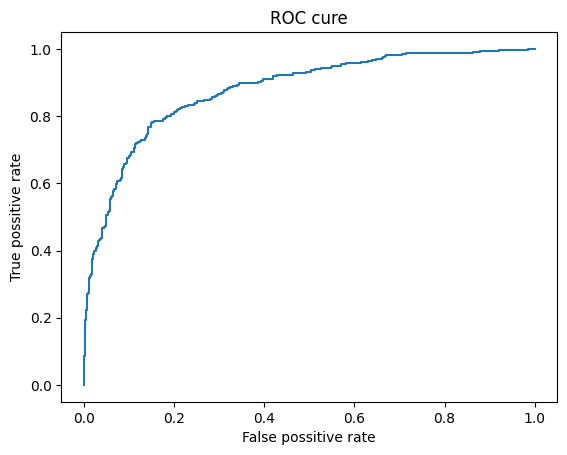

In [ ]:
y_pred=model.predict(X_test_clean)

y_prob=model.predict_proba(X_test_clean)[:,1]
fpr,tpr,threshold=roc_curve(y_test_clean,y_prob)

plt.plot(fpr,tpr)
plt.xlabel("False possitive rate")
plt.ylabel("True possitive rate")
plt.title("ROC cure")
plt.show()


In [ ]:

print("ROC AUC:", roc_auc_score(y_test_clean, y_prob))


ROC AUC: 0.8784860122597531


In [ ]:
from sklearn.metrics import precision_score, f1_score

# Assuming y_test is the true labels and y_pred is the predicted labels
precision = precision_score(y_test_clean, y_pred)
f1 = f1_score(y_test_clean, y_pred)

print(f"Precision: {precision}")
print(f"F1-Score: {f1}")


Precision: 0.8726851851851852
F1-Score: 0.7928496319663512


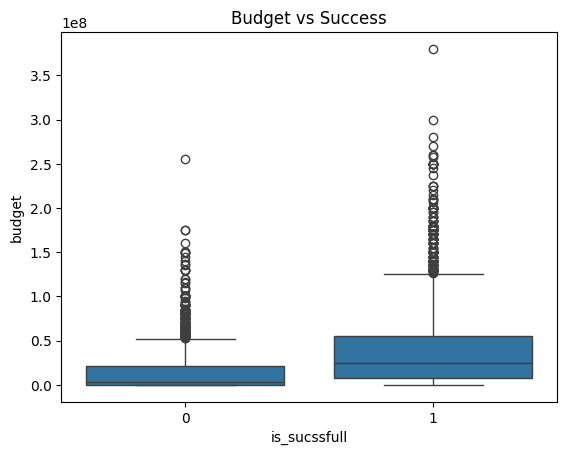

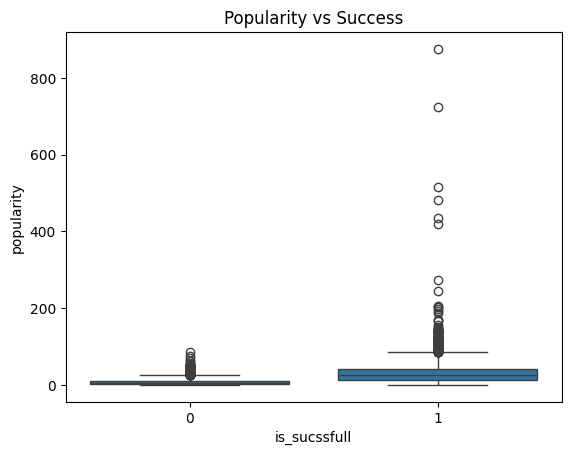

In [46]:
# Budget vs Success
sle.boxplot(x='is_sucssfull', y='budget', data=df)
plt.title('Budget vs Success')
plt.show()

# Popularity vs Success
sle.boxplot(x='is_sucssfull', y='popularity', data=df)
plt.title('Popularity vs Success')
plt.show()


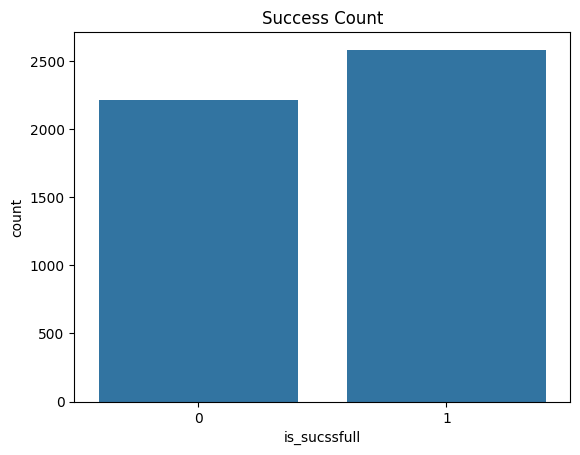

In [ ]:
sle.countplot(x='is_sucssfull', data=df)
plt.title('Success Count')
plt.show()


In [7]:
movie_df.shape


NameError: name 'movie_df' is not defined

In [6]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'movie_success_model.pkl')


NameError: name 'model' is not defined

In [ ]:
model = joblib.load('movie_success_model.pkl')


In [1]:
import pandas as pd

test_data = pd.DataFrame({
    'budget': [100000000],
    'runtime': [90],
    'popularity': [1.0],
    'vote_average': [4.5],
    'vote_count': [100],
    'release_year': [2012]
})


In [ ]:
df['is_sucssfull'].value_counts()


is_sucssfull
1    2585
0    2217
Name: count, dtype: int64

In [ ]:
X_train.columns


Index(['budget', 'runtime', 'popularity', 'vote_average', 'vote_count',
       'release_year'],
      dtype='object')

In [ ]:
new_movie_df = pd.DataFrame(test_data)
prediction = model.predict(test_data)

# Print the result
if prediction[0] == 1:
    print("The movie is predicted to be successful.")
else:
    print("The movie is predicted to be unsuccessful.")


The movie is predicted to be unsuccessful.


In [ ]:
import joblib

# Assuming 'model' is your trained model object
joblib.dump(model, r"C:\Users\nagab\OneDrive\Desktop\ml_1\ml(movie)\movie_sucess_model.pkl")


NameError: name 'model' is not defined

In [ ]:
movie_df


NameError: name 'movie_df' is not defined